<b>ML2.1 Классификация<br>
ПИ19-3 Деменчук Георгий</b>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

Загружаем датасет

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('./diabetes.csv', header=None, names=col_names)
pima = pima[1:]

Смотрим структуру

In [3]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


Выделяем целевую переменную и факторы

In [4]:
Y = pima.label
X = pima.drop(['label'], axis=1)

Разделяем набор данных на обучающую и тестовую выборки

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=True)

Строим модель логистической регрессии

In [6]:
cls = LogisticRegression()

Обучим наш классификатор на обучающей выборке

In [7]:
cls.fit(x_train, y_train)

/opt/homebrew/lib/python3.9/site-packages/scikit_learn-1.1.dev0-py3.9-macosx-11-arm64.egg/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Сделаем предсказания по нашему классификатору на тестовой выборке для оценки эффективности полученной модели

In [8]:
y_pred = cls.predict(x_test)

Оценим эффективность предсказания тестовой выборки при помощи матрицы классификации:

In [9]:
metrics.confusion_matrix(y_test, y_pred)

array([[89, 10],
       [24, 31]])

А это то же самое, но только в красивом виде

Text(0.5, 15.0, 'Предсказанные значения')

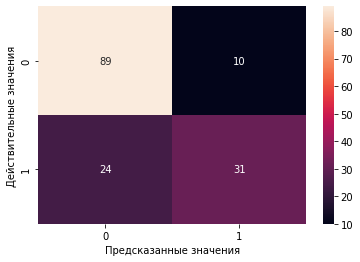

In [10]:
%matplotlib inline

class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)

sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

Метрика достоверности предсказания

In [11]:
metrics.accuracy_score(y_test, y_pred)

0.7792207792207793

Метрика точности

In [12]:
metrics.precision_score(y_test, y_pred, pos_label="0")

0.7876106194690266

Метрика полноты

In [13]:
metrics.recall_score(y_test, y_pred, pos_label="0")

0.898989898989899